In [16]:
import numpy as np

# Data (3 samples)
X = np.array([[1, 2], [2, 1], [3, 0]])  # Features (x1, x2)
y = np.array([0, 1, 1])                   # True labels

# Initialize weights and hyperparameters
w = np.array([0.5, -0.5])  # w1, w2
b = 0.0                     # Bias
alpha = 0.1                 # Learning rate
epochs = 10000              # Training iterations

# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Log Loss (Cost Function)
def log_loss(y_true, y_pred):
    return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

# Gradient Descent
for epoch in range(epochs):
    # Forward pass: Compute predictions
    z = X @ w + b  # Logits (w1*x1 + w2*x2 + b)
    h = sigmoid(z)  # Probabilities
    
    # Compute gradient
    error = h - y
    grad_w = (1 / len(X)) * (X.T @ error)  # Gradient for weights
    grad_b = np.mean(error)                # Gradient for bias
    
    # Update weights and bias
    w -= alpha * grad_w
    b -= alpha * grad_b
    
    # Print cost every 100 epochs
    if epoch % 100 == 0:
        cost = log_loss(y, h)
        # print(f"Epoch {epoch}, Cost: {cost:.4f}")

# Final predictions
final_predictions = sigmoid(X @ w + b)
print("\nFinal Weights:", w)
print("Final Bias:", b)
print("Predictions:", np.round(final_predictions,4))


Final Weights: [ 5.80177035 -5.80176728]
Final Bias: 1.0225178144686119e-06
Predictions: [0.003 0.997 1.   ]


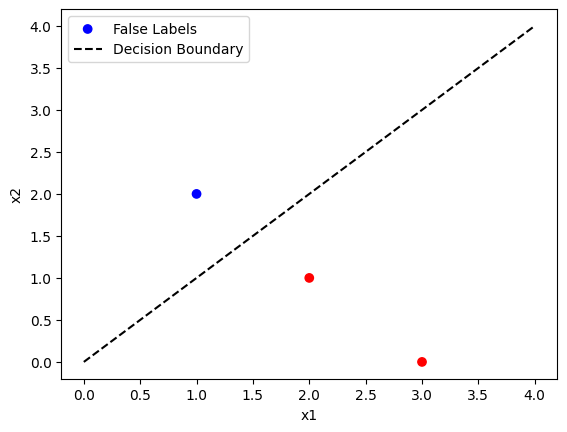

In [19]:
import matplotlib.pyplot as plt

# Plot data points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', label='False Labels')

# Plot decision boundary (w1*x1 + w2*x2 + b = 0)
x1_values = np.linspace(0, 4, 100)
x2_values = -(w[0] * x1_values + b) / w[1]
plt.plot(x1_values, x2_values, 'k--', label='Decision Boundary')

plt.xlabel('x1'); plt.ylabel('x2'); plt.legend()
plt.show()